# Diamonds Price Predict - RandomForest, Adaboost,GradientBoosting

In [11]:
import numpy as np
import pandas as pd
from time import time
import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 1. Data Loding

In [4]:
data = pd.read_csv(r'D:\Users\Sharanya N Rao\Downloads\diamonds.csv.zip',index_col=0)

In [5]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [7]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Correlation Analysis
 EDA (Feature Engineering, Observations, Cleaning)

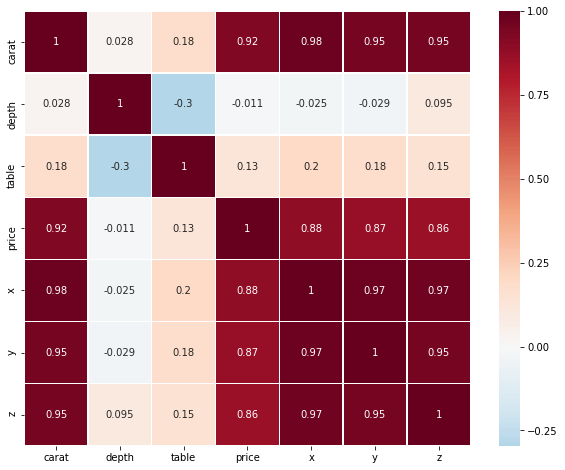

In [8]:

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='RdBu_r', annot=True, linewidths=0.5, center=0)

# 2. EDA (Feature Engineering, Observations, Cleaning)

C:\Users\Sharanya N Rao\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


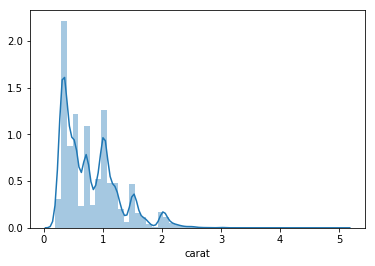

In [8]:
sns.distplot(data['carat'])

In [9]:
data['carat'].ix[np.where(data['carat'] < 2)].count()

C:\Users\Sharanya N Rao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


51785

In [10]:
bins = [0, 1, 2, 3, 4, 10]
label = ['Carat0','Carat1','Carat2','Carat3','Carat4']
data['Categoricalcarat'] = pd.cut(data['carat'], bins, labels=label)

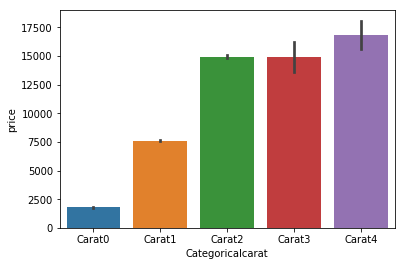

In [11]:
sns.barplot(x='Categoricalcarat', y='price', data=data)

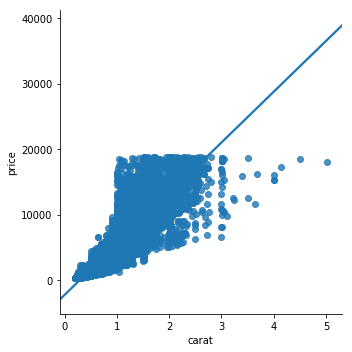

In [12]:
sns.lmplot('carat','price', data=data)

# Volume

1.Volume = x y z
2.Reduced Features by create Volume
3.and Volume has a very High correlation with price more than x, y, z

In [13]:
print(np.where(data['x'] == 0))
print(np.where(data['y'] == 0))
print(np.where(data['z'] == 0))

(array([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557],
      dtype=int64),)
(array([11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype=int64),)
(array([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951,
       24394, 24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556,
       49557, 51506], dtype=int64),)


In [14]:
# Create Volume
data['volume'] = data['x'] * data['y'] * data['z']

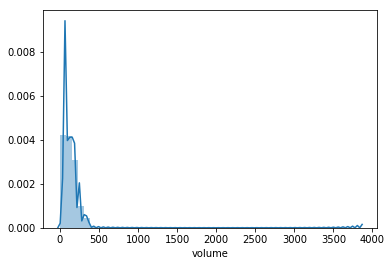

In [15]:
sns.distplot(data['volume'])

In [16]:
data['carat'].ix[np.where(data['volume'] > 200)].count()

8382

In [17]:
np.where(data['volume'] > 1000)

(array([24067], dtype=int64),)

In [18]:
data.ix[np.where(data['volume'] > 1000)]

,carat,cut,color,clarity,depth,table,price,x,y,z,Categoricalcarat,volume
24067,2.01,Premium,J,SI1,60.7,61.0,12209,8.15,8.1,4.93,Carat2,325.45395


In [19]:
print('Diamiond Y Mean : ',data['y'].mean())

Diamiond Y Mean :  5.734525954764462


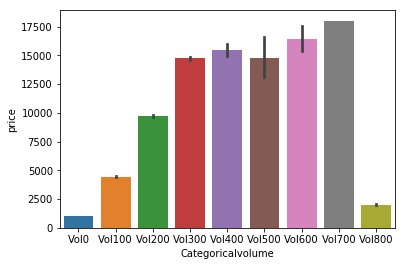

In [20]:
data = data.drop(data.index[np.where(data['volume'] >= 1000)])
data = data.reset_index(drop=True)
#   2-4. Categorize the all Volume value and See the trend
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 1000]
label = ['Vol0','Vol100','Vol200','Vol300','Vol400','Vol500','Vol600','Vol700','Vol800']
data['Categoricalvolume'] = pd.cut(data['volume'], bins, labels=label)
sns.barplot(x='Categoricalvolume', y='price', data=data)
#   2-5. The larger the volume, the increase the average price.
#   2-6. However, the average price of the (800 ~) volume is very low, which is likely to be the wrong data.

In [21]:
data.ix[np.where(data['volume'] >= 800)]
#   2-7. y,z values are excessively larger than the average, and Compared with carat, you can see that the y and z values are entered incorrectly.

,carat,cut,color,clarity,depth,table,price,x,y,z,Categoricalcarat,volume,Categoricalvolume
48409,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,Carat0,838.5024,Vol800
49188,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,Carat0,838.5024,Vol800


In [22]:
print('Diamiond Y Mean : ',data['y'].mean())
print('Diamiond Z Mean : ',data['z'].mean())

Diamiond Y Mean :  5.733540295518922
Diamiond Z Mean :  3.538649956432443


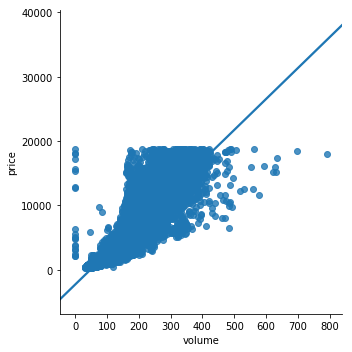

In [23]:
data = data.drop(data.index[np.where(data['volume'] >= 800)])
data = data.reset_index(drop=True)
sns.lmplot('volume','price', data=data)
#   2-8. Volume has a significant positive correlation.

# Cut

1.Cut is a Ordinal Feature
2.Encoding is performed by weighting the Cut to the upper grade.


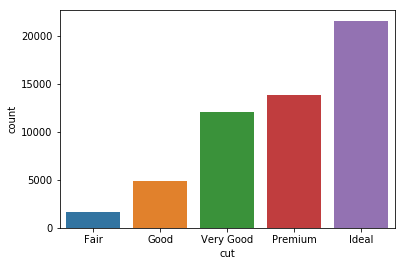

In [24]:
sns.countplot(data['cut'], order=['Fair','Good','Very Good','Premium','Ideal'])

In [25]:
data['carat'].ix[np.where((data['cut'] == 'Premium') | (data['cut'] == 'Ideal'))].count()

35340

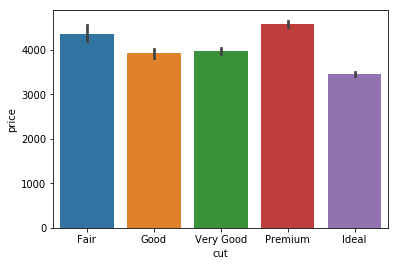

In [26]:
sns.barplot(x='cut', y='price', order=['Fair','Good','Very Good','Premium','Ideal'], data=data)

In [27]:
data.loc[data['cut'] == 'Fair', 'cut'] = 1
data.loc[data['cut'] == 'Good', 'cut'] = 2
data.loc[data['cut'] == 'Very Good', 'cut'] = 3
data.loc[data['cut'] == 'Premium', 'cut'] = 4
data.loc[data['cut'] == 'Ideal', 'cut'] = 5

# Color

Color is Ordinal Feature too

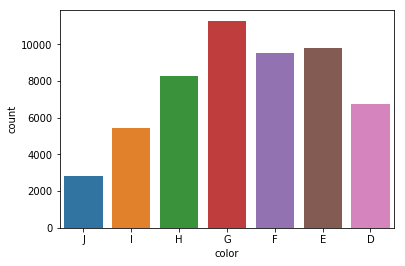

In [28]:
sns.countplot(data['color'], order=['J','I','H','G','F','E','D'])

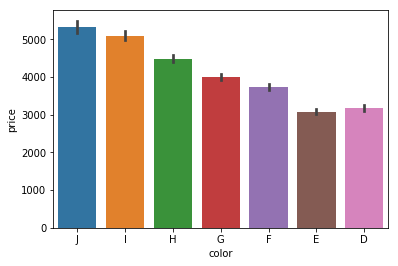

In [29]:
sns.barplot(x='color', y='price', order=['J','I','H','G','F','E','D'], data=data)

In [30]:
print('Color J Mean Price : ', data['price'].ix[np.where(data['color'] == 'J')].mean())
print('Color D Mean Price : ', data['price'].ix[np.where(data['color'] == 'D')].mean())

Color J Mean Price :  5323.81801994302
Color D Mean Price :  3169.9540959409596


In [31]:
data.loc[data['color'] == 'J', 'color'] = 1
data.loc[data['color'] == 'I', 'color'] = 2
data.loc[data['color'] == 'H', 'color'] = 3
data.loc[data['color'] == 'G', 'color'] = 4
data.loc[data['color'] == 'F', 'color'] = 5
data.loc[data['color'] == 'E', 'color'] = 6
data.loc[data['color'] == 'D', 'color'] = 7

# clarity

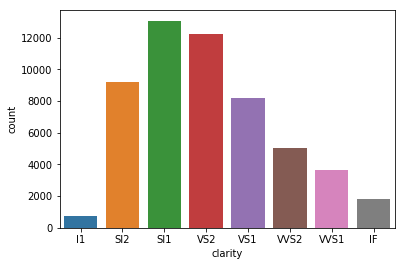

In [32]:
sns.countplot(data['clarity'], order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

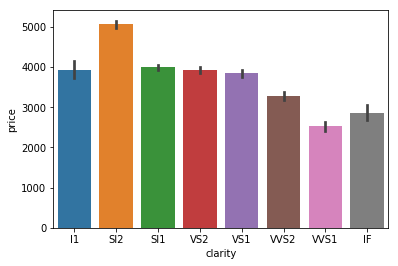

In [33]:
sns.barplot(x='clarity', y='price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=data)

In [34]:
print('Clatity SI2 Mean Price : ', data['price'].ix[np.where(data['clarity'] == 'SI2')].mean())
print('Clatity IF Mean Price : ', data['price'].ix[np.where(data['clarity'] == 'IF')].mean())

Clatity SI2 Mean Price :  5062.251169367997
Clatity IF Mean Price :  2864.839106145251


In [35]:
data.loc[data['clarity'] == 'I1', 'clarity'] = 1
data.loc[data['clarity'] == 'SI2', 'clarity'] = 2
data.loc[data['clarity'] == 'SI1', 'clarity'] = 3
data.loc[data['clarity'] == 'VS2', 'clarity'] = 4
data.loc[data['clarity'] == 'VS1', 'clarity'] = 5
data.loc[data['clarity'] == 'VVS2', 'clarity'] = 6
data.loc[data['clarity'] == 'VVS1', 'clarity'] = 7
data.loc[data['clarity'] == 'IF', 'clarity'] = 8

# Depth




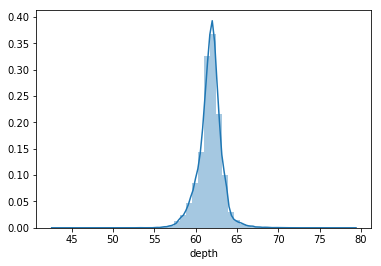

In [36]:
#depth=z/(x,y)
# 6. depth
sns.distplot(data['depth'])

In [37]:
data['depth'].ix[np.where((data['depth'] > 60) & (data['depth'] < 65))].count()

47419

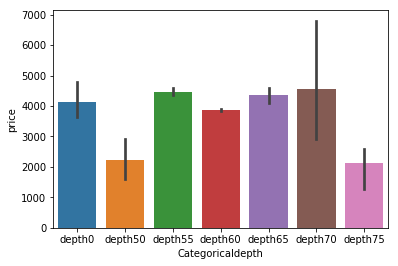

In [38]:
bins = [0, 50, 55, 60, 65, 70, 75, 80]
label = ['depth0','depth50','depth55','depth60','depth65','depth70','depth75']
data['Categoricaldepth'] = pd.cut(data['depth'], bins, labels=label)
sns.barplot(x='Categoricaldepth', y='price', data=data)
#   6-2. depth has a similar average price as a whole, but the average price is lowered by more than half in a certain interval (50 ~ 55) and (70 ~ 75

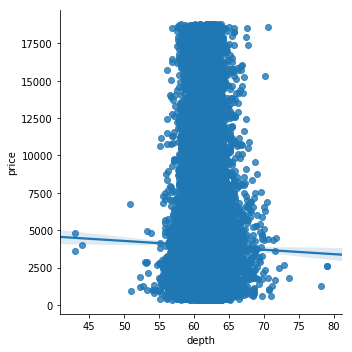

In [39]:
sns.lmplot('depth','price', data=data)

35009

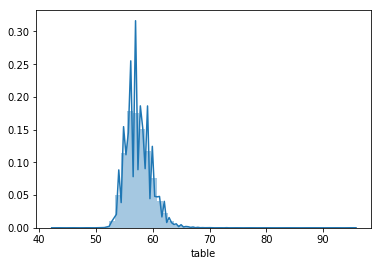

In [40]:
sns.distplot(data['table'])
data['table'].ix[np.where((data['table'] > 55) & (data['table'] < 60))].count()


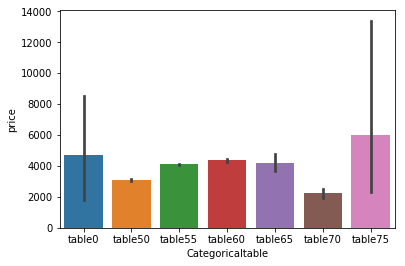

In [41]:
bins = [0, 50, 55, 60, 65, 70, 75, 100]
label = ['table0','table50','table55','table60','table65','table70','table75']
data['Categoricaltable'] = pd.cut(data['table'], bins, labels=label)
sns.barplot(x='Categoricaltable', y='price', data=data)

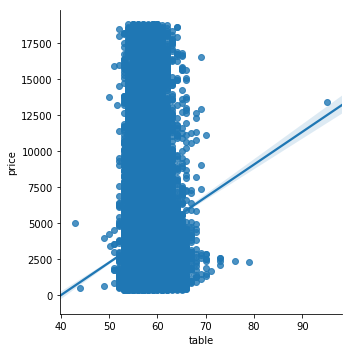

In [42]:
sns.lmplot('table','price', data=data)


In [43]:
data = data.drop(['x','y','z'], axis=1)
data = data.drop(['Categoricalvolume','Categoricalcarat','Categoricaldepth','Categoricaltable'], axis=1)
data.head(10)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250
5,0.24,3,1,6,62.8,57.0,336,38.693952
6,0.24,3,2,7,62.3,57.0,336,38.830870
7,0.26,3,3,3,61.9,55.0,337,42.321081
8,0.22,1,6,4,65.1,61.0,337,36.425214
9,0.23,3,3,5,59.4,61.0,338,38.718000


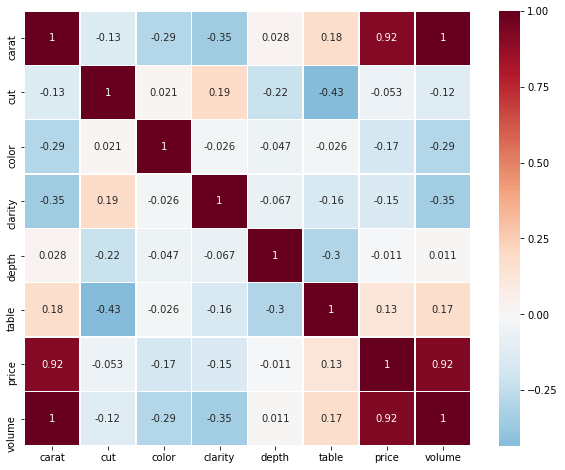

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='RdBu_r', annot=True, linewidths=0.5, center=0)

# 3. Cleaned up Data Set prepare

1.Set Explanatory variable X, Response variable y(Price)
2.Scale Standardization
3.Data Split (Train, Test) - Test ratio 0.25

In [47]:
def pred_vis(name, y_test_vis, y_pred_vis):
    if y_test_vis.shape[0] > 200:
        y_test_vis = y_test_vis[:200]
        y_pred_vis = y_pred_vis[:200]
        
    y_test_m_vis = y_test_vis.as_matrix()
    plt.figure(figsize=(12,5))
    plt.title('%s Prediction' %name)
    plt.plot(y_test_m_vis, c='steelblue', alpha=1)
    plt.plot(y_pred_vis, c='darkorange', alpha=2)
    legend_list = ['y_test', 'y_pred']
    plt.xlabel('Var')
    plt.ylabel('Output')
    plt.legend(legend_list, loc=1, fontsize='10')
    plt.grid(True)
    plt.show()

    
# GridSearchCV, RandomizedSearchCV Report Function
# -> by. scikit-learn.org "Comparing randomized search and grid search for hyperparameter estimation"
def report(results, n_top=3):
    lcount = 0
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results['mean_test_score'][candidate],
                    results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            if lcount > 2:
                break
            lcount += 1


def model_scores(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    global X_test
    adj_r2 = 1 - (1 - r2)*float(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    print('MSE    : %0.2f ' % mse)
    print('MAE    : %0.2f ' % mae)
    print('RMSE   : %0.2f ' % rmse)
    print('R2     : %0.2f ' % r2)
    print('Adj_R2 : %0.2f ' % adj_r2)
    return {'mse':[mse], 'rmse':[rmse], 'r2':[r2]}


def result_vis(r2_results_vis, names_vis):
    fig =plt.figure(figsize=(6,6))
    fig.suptitle('Algorithm Comparison - R2')
    ax = fig.add_subplot(111)
    plt.barh(np.arange(len(names_vis)), sum(r2_results_vis, []), align="center")
    ax.set_yticks(np.arange(len(names_vis)))
    ax.set_yticklabels(names_vis)
    ax.invert_yaxis()  # labels read top-to-bottom
    plt.grid(True)

# 4. Define MachineLearning Model

1.RandomForest
2.GradientBoosting


In [48]:
models = []
models.append(('RandomForest ', RandomForestRegressor(n_estimators=1000)))
models.append(('AdaBoost     ', AdaBoostRegressor(n_estimators=1000)))
models.append(('GBM          ', GradientBoostingRegressor(n_estimators=1000)))


# 5. Training and Evaluate Each Model

1.Model Fit
2.Model Report
3.Visualization


## RandomForest  ##################################
Test score : 0.9802
MSE    : 313120.92 
MAE    : 280.06 
RMSE   : 559.57 
R2     : 0.98 
Adj_R2 : 0.98 


C:\Users\Sharanya N Rao\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


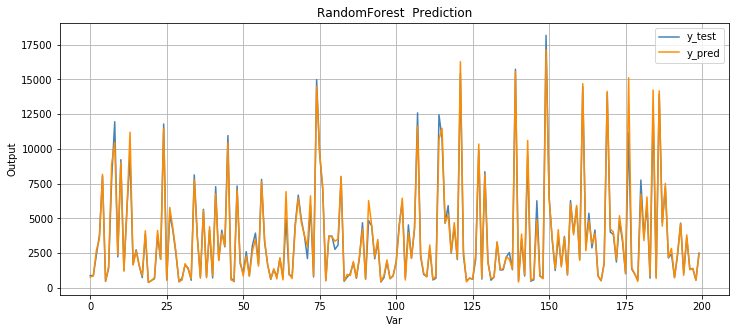


## AdaBoost      ##################################
Test score : 0.9162
MSE    : 1323271.95 
MAE    : 890.36 
RMSE   : 1150.34 
R2     : 0.92 
Adj_R2 : 0.92 


C:\Users\Sharanya N Rao\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


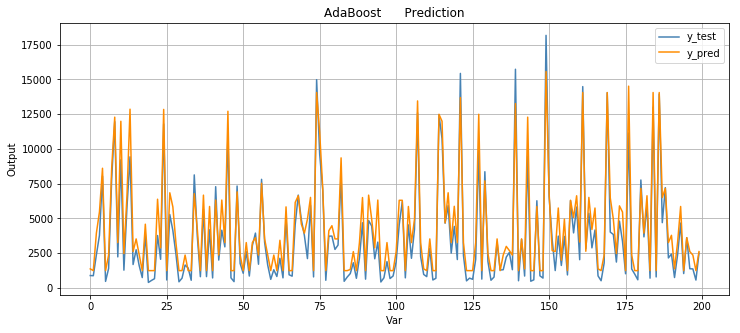


## GBM           ##################################
Test score : 0.9802
MSE    : 312850.55 
MAE    : 292.13 
RMSE   : 559.33 
R2     : 0.98 
Adj_R2 : 0.98 


C:\Users\Sharanya N Rao\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


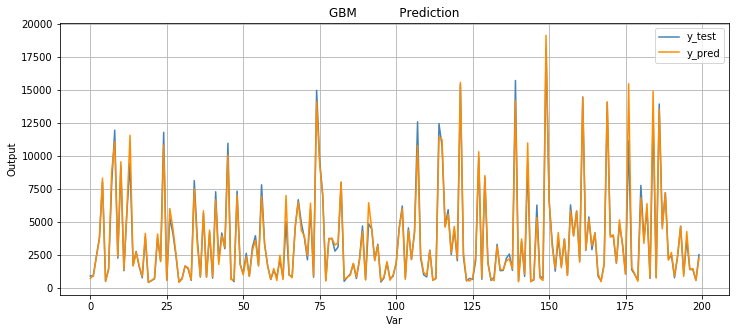

In [49]:
r2_results = []
names = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('')
    print('## %s ##################################' % name)
    print('Test score : %.4f' % model.score(X_test, y_test))
    results = model_scores(y_test, y_pred)

    pred_vis(name, y_test, y_pred)
    
    r2_results.append(results['r2'])
    names.append(name.replace(' ', ''))

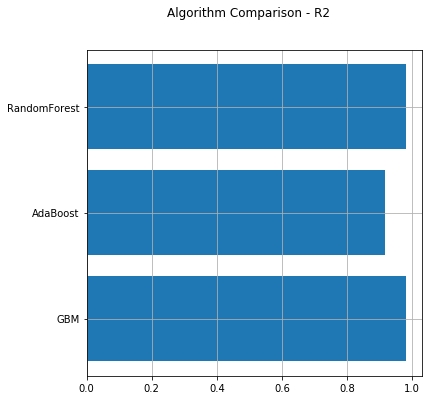

In [50]:
result_vis(r2_results, names)


C:\Users\Sharanya N Rao\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Sharanya N Rao\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


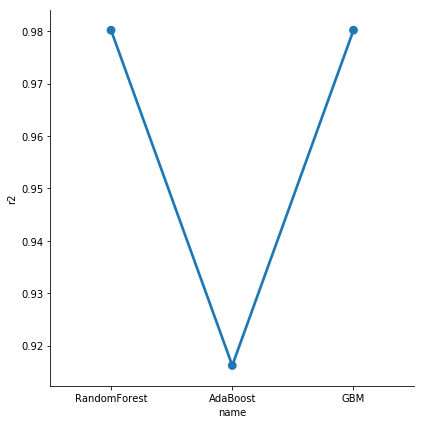

In [51]:
sns.factorplot('name','r2', data=pd.DataFrame({'name':names, 'r2':[round(i, 4) for i in sum(r2_results, [])]}), size=6)